# Loading Packages

In [7]:
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt  # For plotting graphs 
%matplotlib inline 
import warnings   # To ignore any warnings warnings.filterwarnings("ignore")

# Reading data

In [8]:
train=pd.read_csv("train_ctrUa4K.csv") 
test=pd.read_csv("train_ctrUa4K.csv")

# Understanding Data

In [9]:
#check the features present in our data
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

We have __12 independent variables__ and __1 target variable__, i.e. __Loan_Status__ in the train dataset.

In [10]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

We have similar features in the test dataset as the train dataset __except the Loan_Status__

In [11]:
# Print data types for each variable train.dtypes
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [12]:
# the shape of the dataset.
train.shape, test.shape

((614, 13), (614, 13))

# Univariate Analysis 

In [13]:
#frequency table of target variable
train['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [14]:
# Normalize can be set to True to print proportions instead of number 
train['Loan_Status'].value_counts(normalize=True)

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64

<Axes: xlabel='Loan_Status'>

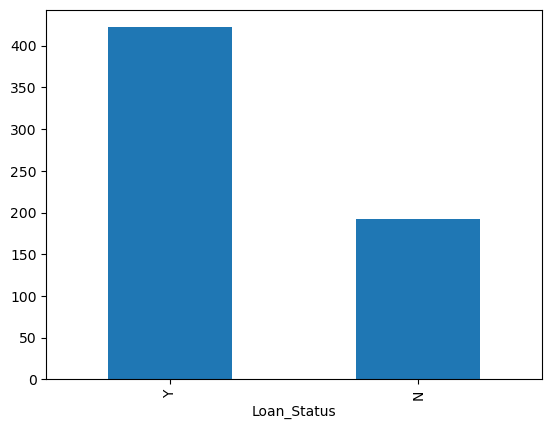

In [15]:
#bar plot for visulalisation of distribution of target variable
train['Loan_Status'].value_counts().plot.bar()

* The loan of 422 people out of 614 was approved.
* The approval rate is around 69%

### Categorical Variable

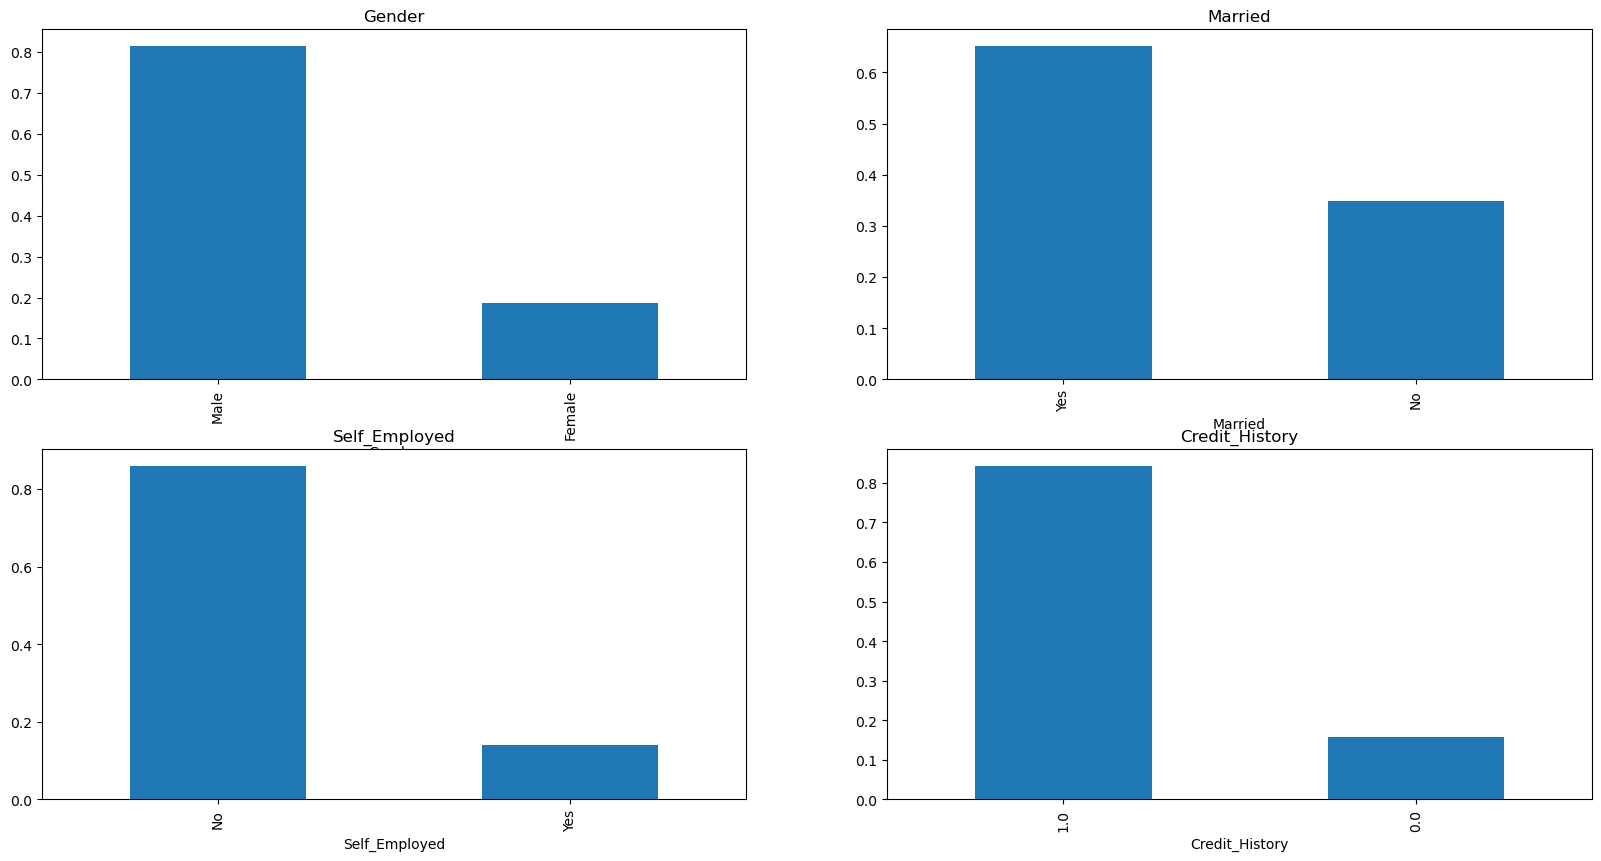

In [16]:
plt.figure(1) 
plt.subplot(221) 
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender') 
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.subplot(224) 
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 
plt.show()

It can be inferred from the above bar plots that:

* 80% applicants in the dataset are male.
* Around 65% of the applicants in the dataset are married.
* Around 15% applicants in the dataset are self employed.
* Around 85% applicants have repaid their debts.

### Ordinal Variable

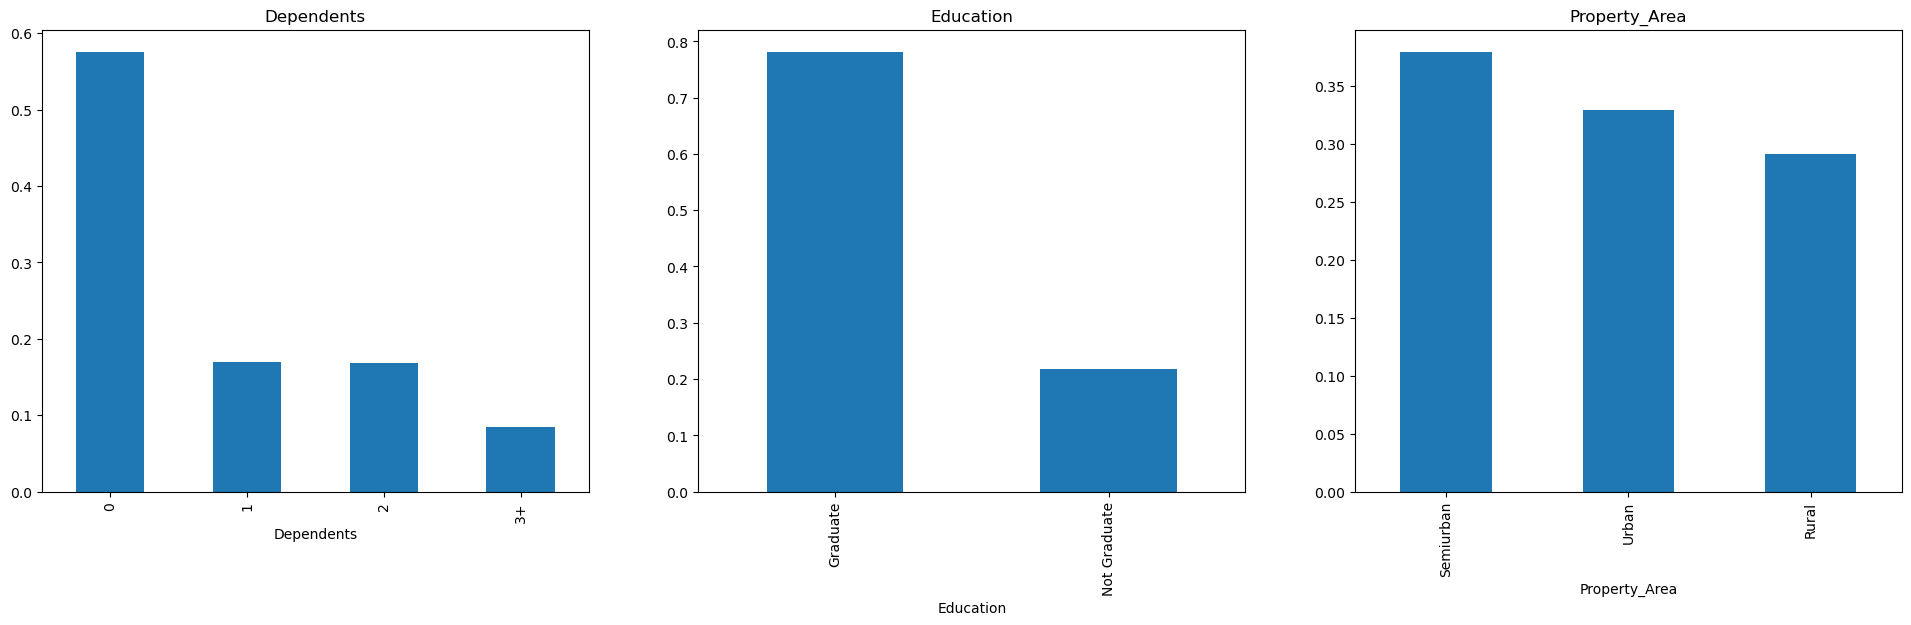

In [17]:
plt.figure(1) 
plt.subplot(131) 
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents') 
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 
plt.subplot(133) 
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 
plt.show()

Following inferences can be made from the above bar plots:

* Most of the applicants don’t have any dependents.
* Around 80% of the applicants are Graduate.
* Most of the applicants are from Semiurban area.

### Numerica Variable

C:\Users\victus\AppData\Local\Temp\ipykernel_34932\1596720101.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['ApplicantIncome']);
c:\Users\victus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


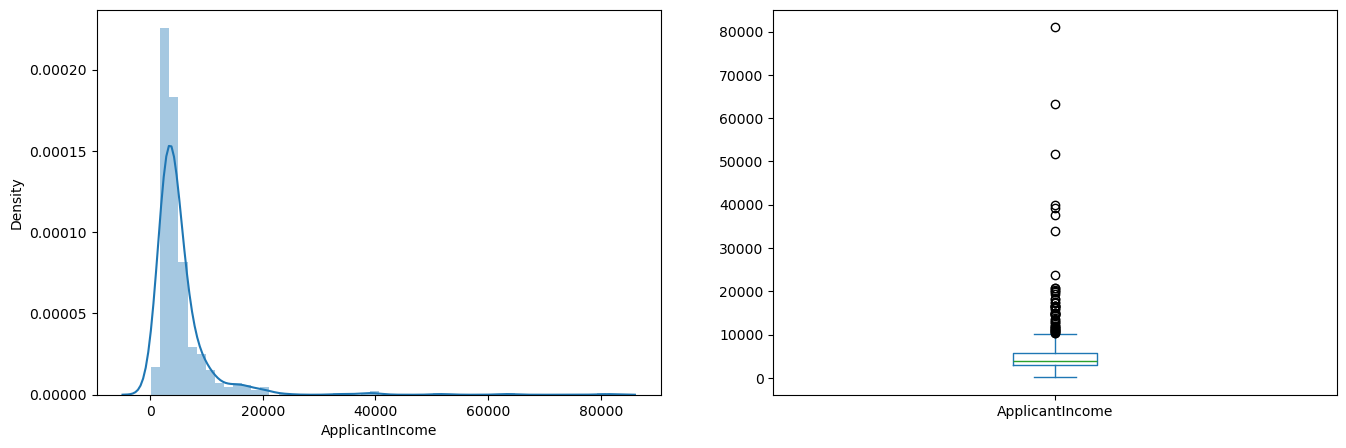

In [18]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['ApplicantIncome']); 
plt.subplot(122) 
train['ApplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

* It can be inferred that most of the data in the distribution of applicant income is towards __left__ which means it is __not normally distributed__. 

* The boxplot confirms the __presence of a lot of outliers/extreme values__. This can be attributed to the __income disparity__ in the society

Text(0.5, 0.98, '')

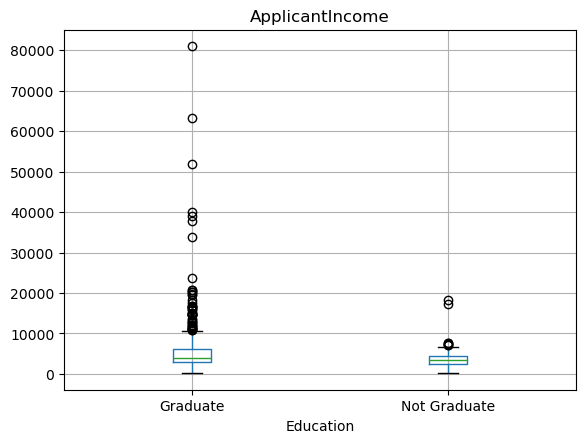

In [19]:
train.boxplot(column='ApplicantIncome', by = 'Education') 
plt.suptitle("")


We can see that there are a __higher number__ of graduates with very high incomes, which are appearing to be the __outliers__.

C:\Users\victus\AppData\Local\Temp\ipykernel_34932\107606512.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['CoapplicantIncome']);
c:\Users\victus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


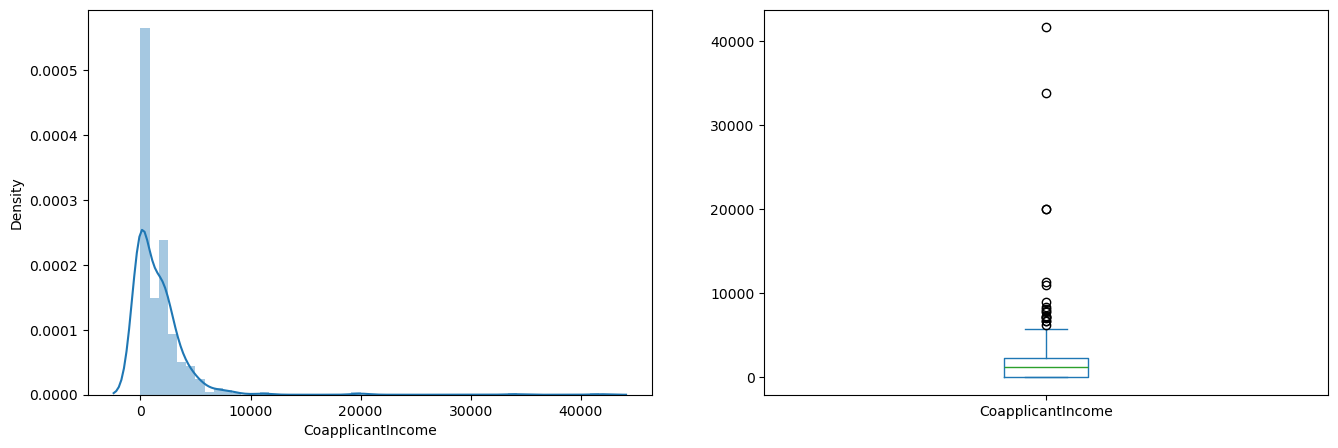

In [20]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['CoapplicantIncome']); 
plt.subplot(122) 
train['CoapplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

* Majority of coapplicant’s income ranges from __0 to 5000.__
* We also see a lot of outliers in the coapplicant income and it is __not normally distributed.__

C:\Users\victus\AppData\Local\Temp\ipykernel_34932\2548704915.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LoanAmount']);
c:\Users\victus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


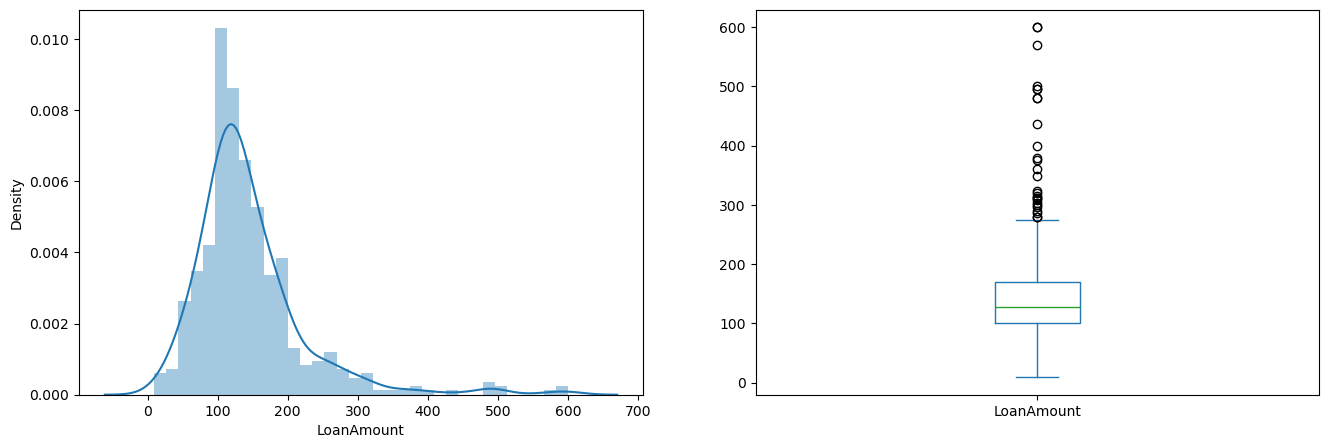

In [21]:
plt.figure(1) 
plt.subplot(121) 
df=train.dropna() 
sns.distplot(df['LoanAmount']); 
plt.subplot(122) 
df['LoanAmount'].plot.box(figsize=(16,5)) 
plt.show()

* Outliers are present 
* the distribution is fairly normal. 

# Bivariate Analysis

### Categorical Variable vs Target Variable

<Axes: xlabel='Gender'>

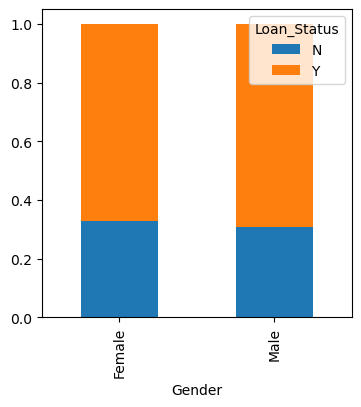

In [22]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

* It can be inferred that the proportion of male and female applicants is more or less __same__ for both approved and unapproved loans.

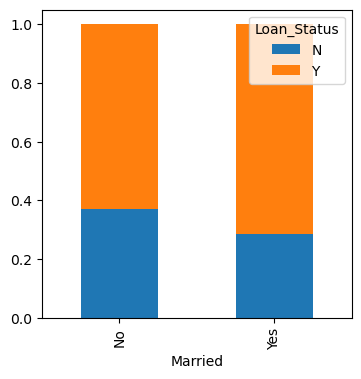

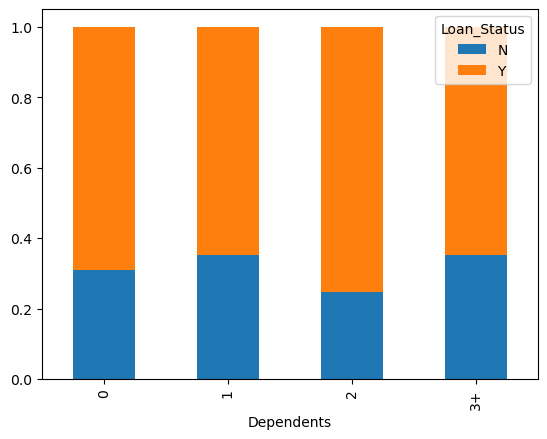

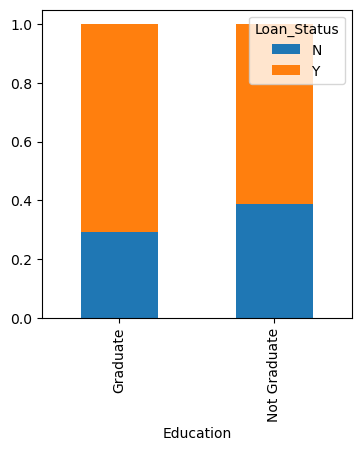

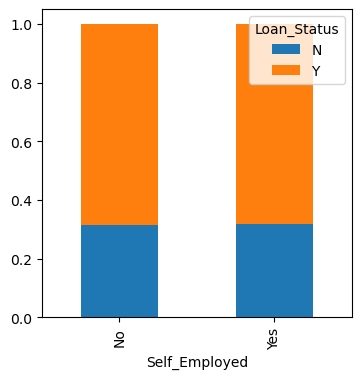

In [23]:
Married=pd.crosstab(train['Married'],train['Loan_Status']) 
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status']) 
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status']) 
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show() 
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show() 
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show() 
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show()

* Proportion of __married applicants__ is __higher__ for the approved loans.
* Distribution of applicants with __1 or 3+ dependents__ is __similar__ across both the categories of Loan_Status.
* There is __nothing significant__ we can infer from __Self_Employed vs Loan_Status plot.__

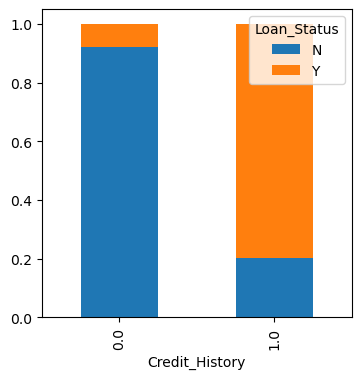

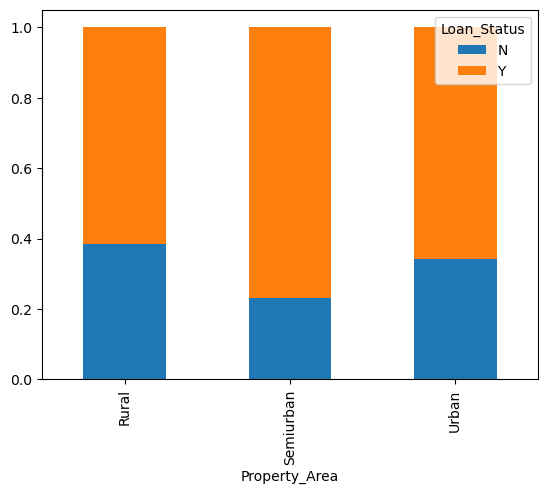

In [24]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status']) 
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show() 
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show()

* It seems people with __credit history as 1__ are __more likely__ to get their loans approved.
* Proportion of loans getting approved in __semiurban area__ is __higher__ as compared to that in rural or urban areas.

### Numerical Variable vs Target Variable

<Axes: xlabel='Loan_Status'>

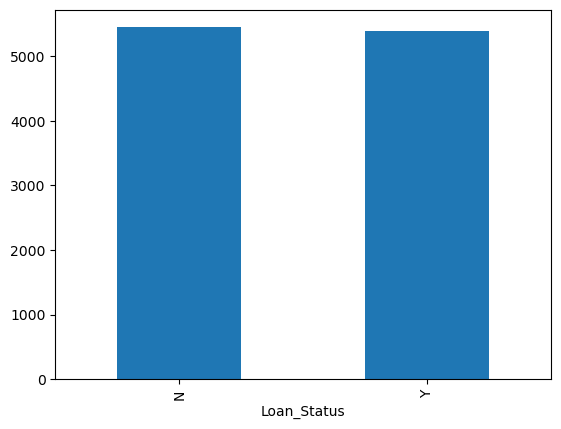

In [25]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

There is not visible difference between __the mean income__ of people for which the loan has been __approved__ vs the mean income of people for which the loan has __not been approved.__

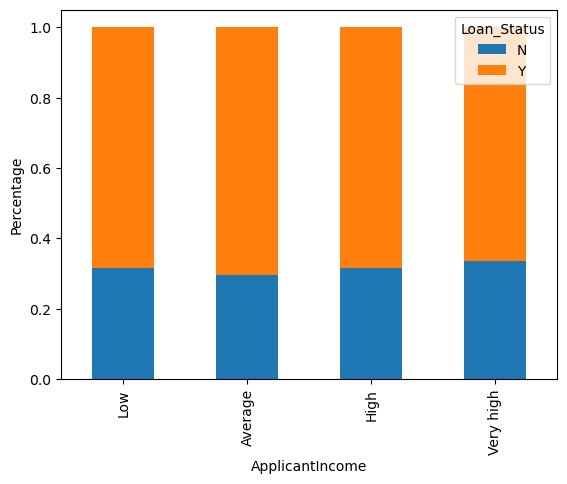

In [26]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('ApplicantIncome') 
P = plt.ylabel('Percentage')

Analysing bins for the applicant income variable based on the values in it and the corresponding loan status for each bin.It can be inferred that __Applicant income__ __does not affect__ the chances of __loan approval__ 

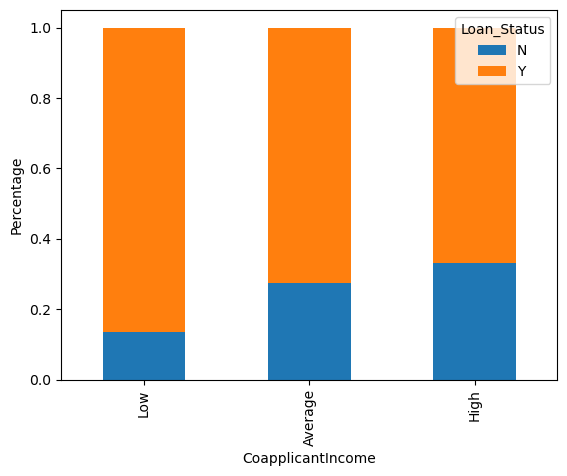

In [27]:
bins=[0,1000,3000,42000] 
group=['Low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status']) 
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')

 * __coapplicant’s income__ is less the chances of loan approval are high

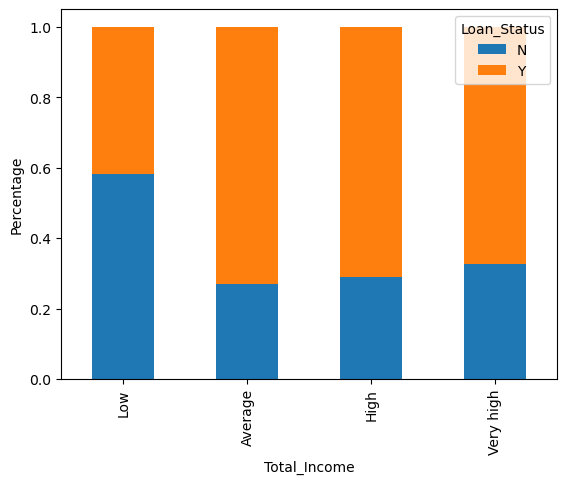

In [28]:
#new variable in which we will combine the applicant’s and coapplicant’s income t
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income') 
P = plt.ylabel('Percentage')

* Proportion of loans getting approved for applicants having __low Total_Income__ is __very less__ as compared to that of applicants with __Average, High and Very High Income.__

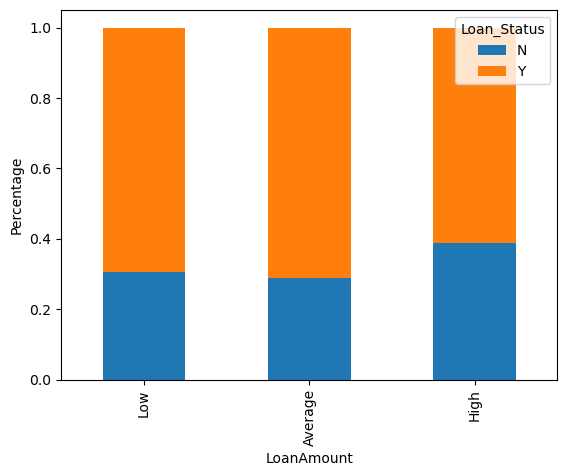

In [29]:
bins=[0,100,200,700]
group=['Low','Average','High'] 
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status']) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')


* the proportion of approved loans is __higher__ for __Low and Average Loan Amount__ as compared to that of High Loan Amount

In [30]:
# drop the bins, change the 3+ in dependents variable to 3, convert the target variable’s categories into 0 and 1 

train=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)
train['Dependents'].replace('3+', 3,inplace=True) 
test['Dependents'].replace('3+', 3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

In [31]:
# heat map to visualize the correlation
matrix = train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu")

ValueError: could not convert string to float: 'LP001002'

* Highly correlated variables are __(ApplicantIncome - LoanAmount)__
*  Also __(Credit_History - Loan_Status).__ is higly correlated
* __LoanAmount__ is also correlated with __CoapplicantIncome.__

# Missing Values and Outlier Treatment 

In [32]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

* There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History features.
* For numerical variables: imputation using mean or median
* For categorical variables: imputation using mode

In [33]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True) 
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [34]:
train['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [35]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [36]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [37]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [38]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True) 
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True) 
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

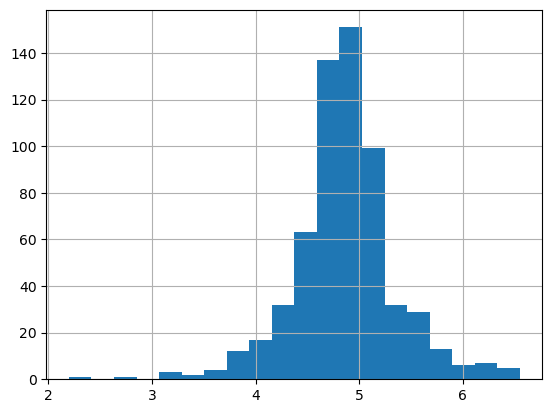

In [39]:
#log transformation
train['LoanAmount_log'] = np.log(train['LoanAmount']) 
train['LoanAmount_log'].hist(bins=20) 
test['LoanAmount_log'] = np.log(test['LoanAmount'])

* the distribution looks much closer to normal and effect of extreme values has been significantly subsided. 

# Feature Engineering

In [40]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome'] 
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

* combine the Applicant Income and Coapplicant Income

C:\Users\victus\AppData\Local\Temp\ipykernel_34932\2845973276.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Total_Income']);
c:\Users\victus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


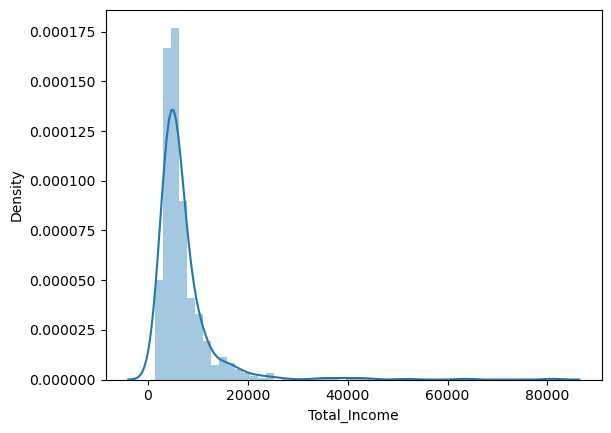

In [41]:
sns.distplot(train['Total_Income']);

* Distribution is shifted towards left, i.e., the distribution is right skewed.

C:\Users\victus\AppData\Local\Temp\ipykernel_34932\2645053949.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Total_Income_log']);
c:\Users\victus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


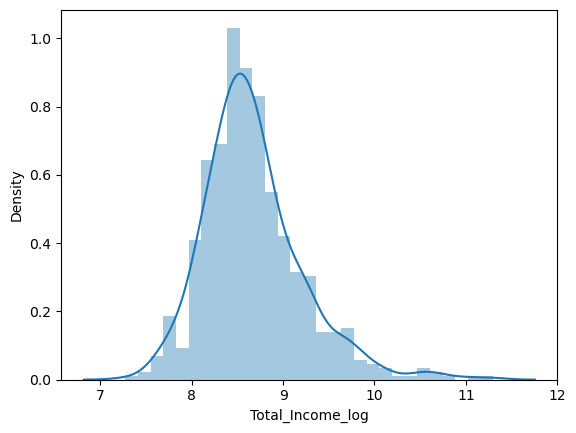

In [42]:
train['Total_Income_log'] = np.log(train['Total_Income']) 
sns.distplot(train['Total_Income_log']); 
test['Total_Income_log'] = np.log(test['Total_Income'])

* After taking the log transformation to make the distribution normal.
* Now the distribution looks much closer to normal 

In [43]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']

* calculate the EMI by taking the ratio of loan amount with respect to loan amount term.

C:\Users\victus\AppData\Local\Temp\ipykernel_34932\4215624078.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['EMI']);
c:\Users\victus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


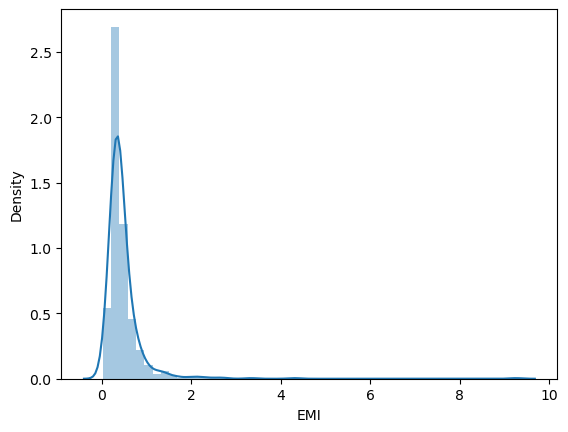

In [44]:
sns.distplot(train['EMI']);

In [45]:
# Multiply with 1000 to make the units equal test['Balance Income']=test['Total_Income']-(test['EMI']*1000)
train['Balance Income']=train['Total_Income']-(train['EMI']*1000)

* the income left after the EMI has been paid

C:\Users\victus\AppData\Local\Temp\ipykernel_34932\1536547231.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Balance Income']);
c:\Users\victus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


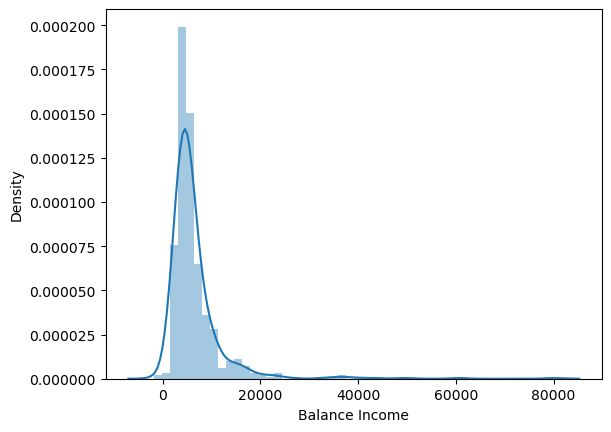

In [46]:
sns.distplot(train['Balance Income']);

In [47]:
train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1) 
test=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

* drop the variables which we used to create these new features. 
* because the correlation between those old features and these new features will be very high
* removing correlated features will help in reducing the noise too.

# Model Building

In [48]:
#drop the Loan_ID variable 
train=train.drop('Loan_ID',axis=1) 
test=test.drop('Loan_ID',axis=1)

* Loan Id is not a significant variable and d=it is not required as a feature for building model

In [51]:
#Seperate features and target
X = train.drop('Loan_Status',1)
y = train.Loan_Status

TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 3 were given

* Loan Status is target variabel so seggregating it

In [50]:
#dummy variables for the categorical variables
X=pd.get_dummies(X) 
train=pd.get_dummies(train) 
test=pd.get_dummies(test)

NameError: name 'X' is not defined

* Dummy variables for Categorical Variable so each category can be given as a seperate feature to the model

In [ ]:
#import required libraries
from sklearn import tree
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [ ]:
# a cross validation Decision Tree model with stratified 5 folds and make predictions for test dataset.
i=1 
kf = StratifiedKFold(n_splits=5,random_state=3,shuffle=True) 
accuracy_list = []
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))   
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = tree.DecisionTreeClassifier(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test) 
    accuracy_list.append(score)
    print('accuracy_score',score)     
    i+=1 
    


1 of kfold 5
accuracy_score 0.6854838709677419

2 of kfold 5
accuracy_score 0.6935483870967742

3 of kfold 5
accuracy_score 0.680327868852459

4 of kfold 5
accuracy_score 0.7377049180327869

5 of kfold 5
accuracy_score 0.819672131147541


In [ ]:
mean_accuracy = sum(accuracy_list)/ len(accuracy_list)
print(mean_accuracy)

0.7233474352194607


* Mean Accuracy for the model is around 0.72